Input: adjacency matrix


In [90]:
# Obtaining the list of ingredients for each recipe. Only interested
# in the ingredients, and so I've stripped the other information such as URL
import json

with open('recipes-1.JSON') as recipes:
    data = json.load(recipes)
# print(data)

ingrs_per_recipe = []
for obj in data:
    ingrs_per_recipe.append(obj["ingredients"])
print(ingrs_per_recipe)

[['ponzu', 'shallot', 'mustard', 'olive', 'olive oil', 'wasabi', 'steak', 'tea', 'cucumber', 'salt'], ['rice', 'vinegar', 'rice vinegar', 'lemon', 'lime', 'lime juice', 'soy sauce'], ['paprika', 'sugar', 'brown sugar', 'salt', 'mustard', 'seed', 'garlic', 'garlic powder', 'onion', 'onion powder', 'oregano', 'coriander', 'cumin', 'tea', 'pepper', 'red pepper flakes', 'red pepper', 'ketchup', 'molasses', 'worcestershire sauce', 'apple', 'cider', 'vinegar', 'apple cider vinegar', 'pork'], ['flour', 'sugar', 'salt', 'tea', 'butter', 'water'], ['pepper', 'poblano', 'poblano pepper', 'potato', 'salt', 'vinegar', 'white vinegar', 'onion', 'red onion', 'tea', 'thyme', 'cilantro', 'parsley'], ['lemon', 'lemons', 'sugar', 'tea'], ['lemon', 'lemons', 'sugar', 'water'], ['water', 'tea'], ['bean', 'beans', 'pinto bean', 'pinto beans', 'salt', 'bacon', 'onion', 'chili', 'seed', 'seeds', 'clove', 'cloves', 'garlic', 'tomato', 'tomatoes', 'chicken', 'epazote', 'cilantro'], ['coffee', 'tea', 'chocolate

In [205]:
# getting the list of ingredients, lowercasing, then uniqifying
with open('foodList.txt') as f:
        ing_list = f.readlines()
ing_list = [ing[:-1].lower() for ing in ing_list]
uniq_ing_list = list(set(ing_list)) # had 3 duplicates
print('fennel seeds' in uniq_ing_list)


True


In [287]:
import pandas as pd
import itertools as iter

columns = uniq_ing_list
df = pd.DataFrame(0, index=columns, columns=columns)

for ingredient_list in ingrs_per_recipe:
    for pair in list(iter.permutations(ingredient_list,2)):
        r = pair[0]
        c = pair[1]
        curr_value = df.loc[r, c]
        new_value = curr_value + 1
        df.ix[r, c] = new_value       

# diagonal should be set to 0 because no such case that 
# apples will be paired with apples
df.values[[np.arange(len(columns))]*2] = 0


print(df.loc['fennel',:]) # was originally a duplicate

rookwurst               0
chicken liver           0
moambe sauce            0
bulgur                  0
passion fruit           0
hash browns             0
argan oil               0
basil                   0
bouillon                0
red cabbages            0
ketchup                 1
granola                 0
soy milk                0
meringue powder         0
wheat                   0
anise                   0
cheddar cheese          0
fennel seeds            0
madeira                 0
almond bark             0
guava                   0
liverwurst              0
aquavit                 0
baking soda             1
chipotles               0
orgeat syrup            0
sweet chili sauce       0
edamame                 0
monosodium glutamate    0
provel rope cheese      0
                       ..
capsicum                0
feta                    0
truffle                 0
ugli fruit              0
apricot                 0
cremini mushroom        0
saltines                0
aspic       

In [ ]:
import math
import heapq # >>> TEMP <<<

# Dijkstra's algorithm for finding shortest path between two nod
# Input: 
# 1. AdjDF: Adjacency data frame
# 2. weight: weighing scheme (AdjDF.loc['i', 'j'])
# 3. start: starting node 
#
# Note: This will differ slightly from a typical implementation, as it's written
# in congruence with pandas
#
# Note2: Have temporariliy implemented with heapq. Will make binary heap class asap.
#

def  Dijkstra(AdjMat, start):
    # Initializations
    distance = {}
    previous = {} # also commonly referred to as predecessor
    vertices = list(AdjMat.columns.values) # equivalent to uniq_ing_list; also returns array
    nonheapified = [] # >>> TEMP <<<
    
    # Set properties for all nodes
    for vertex in vertices:
        # Set properties for start node
        if vertex == start:
            distance[vertex] = 0
            previous[vertex] = None
        else:
            distance[vertex] = math.inf
        color[vertex] = 'white'
        nonheapified.append((distance[vertex], vertex))
       
    # Using binary heap as min-priority queue
    # NOTE: this is temporary. Will implement binary heap
    priority_queue = heapify(nonheapified)
    
    while not priority_queue:
        new_vertex = heappop()[1] # heappop() -> (weight, label)
        for neighbor in AdjMat.index[(AdjMat != 0)[new_vertex]]  # return row names with non-zero values
            new_path = distance[new_vertex] + AdjMat.loc[new_vertex, neighbor] # the second summand is our weighing "function"
            # Relaxation
            if new_path < distance[neighbor]: # if we find a shorter path...
                distance[neighbor] = new_path # update with new path and distance
                # DECREASE-KEY O(n)
                for tuple in priority_queue:
                    if tuple[1] == neighbor:
                        tuple[0] = distance[neighbor]              
                previous[neighbor] = new_vertex
            color[new_vertex] = 'black';
    

In [366]:
h = [(5, 'write code'), (7, 'release product'), (1, 'write spec'), (3, 'create tests')]
heapify(h)
print(h)
heappush(h, (2, 'create tests'))
print(h)




[(1, 'write spec'), (3, 'create tests'), (5, 'write code'), (7, 'release product')]
[(1, 'write spec'), (2, 'create tests'), (5, 'write code'), (7, 'release product'), (3, 'create tests')]


<IPython.core.display.Javascript object>


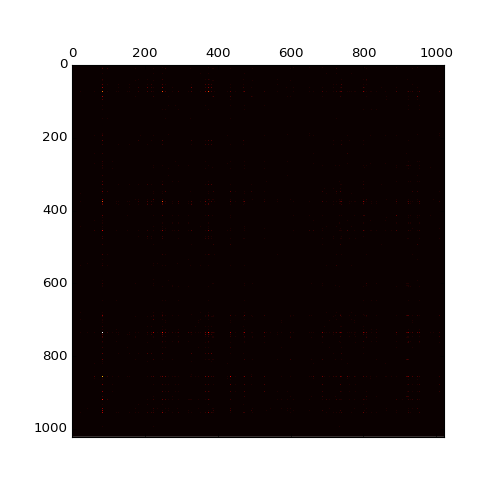

In [288]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

nparray = df.as_matrix()

plt.matshow(nparray, cmap='hot', interpolation='none') # when more data, try without interpolation

In [245]:
from heapq import *

def heapsort(iterable):
    h = []
    for value in iterable:
        heappush(h, value)
        print(h)
    return [heappop(h) for i in range(len(h))]

heapsort([1, 3, 5, 7, 9, 2, 4, 6, 8, 0])

# h = uniq_ing_list


[1]
[1, 3]
[1, 3, 5]
[1, 3, 5, 7]
[1, 3, 5, 7, 9]
[1, 3, 2, 7, 9, 5]
[1, 3, 2, 7, 9, 5, 4]
[1, 3, 2, 6, 9, 5, 4, 7]
[1, 3, 2, 6, 9, 5, 4, 7, 8]
[0, 1, 2, 6, 3, 5, 4, 7, 8, 9]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [249]:
if not []:
    print('dunno')

dunno


In [280]:
columns = ['a', 'b', 'c']
df = pd.DataFrame([[1, 0, 1], [0, 1, 0], [3, 5, 2]], index=columns, columns=columns)
print(df)

print(np.arange(3))
df.values[[np.arange(len(columns))]*2] -= 1
print(df)

print('-------------')
a = df.index[(df != 0)['c']]
for i in a:
    print(i, type(i))


   a  b  c
a  1  0  1
b  0  1  0
c  3  5  2
[0 1 2]
   a  b  c
a  0  0  1
b  0  0  0
c  3  5  1
-------------
a <class 'str'>
c <class 'str'>


In [378]:
a=[1,2,3,1,3,2,1,1]
a = [4 if x==1 else x for x in a]
print(a)

[4, 2, 3, 4, 3, 2, 4, 4]
